# Telecom Churn Case Study

## Data Preperation

### Importing libraries

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 250, "display.max_rows", 250)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [3]:
from imblearn.over_sampling import SMOTE, ADASYN

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFECV

from sklearn import metrics

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

### Importing and inspecting the dataset

In [6]:
data = pd.read_csv("telecom_churn_data.csv", index_col="mobile_number")

data.rename_axis(None, inplace=True)

data.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,

In [7]:
data.shape

(99999, 225)

In [8]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Columns: 225 entries, circle_id to sep_vbc_3g
dtypes: float64(179), int64(34), object(12)
memory usage: 228.6 MB


### Retaining only high-value customers

**Check for null values**

In [9]:
data[["arpu_6","arpu_7"]].isna().sum()

arpu_6    0
arpu_7    0
dtype: int64

**Retaining only those customers having average ARPU greater than 70th percentile**

In [10]:
avg_arpu_good_phase = data[["arpu_6","arpu_7"]].mean(axis=1)

data_high_val = data[avg_arpu_good_phase >= avg_arpu_good_phase.quantile(0.7)]

data_high_val.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,NaN,0.0,0.0,0.0,NaN,60.86,75.14,77.84,NaN,0.0,0.18,10.01,NaN,4.50,0.00,6.50,NaN,0.00,0.0,0.0,NaN,487.53,609.24,350.16,0.00,58.14,32.26,27.31,NaN,217.56,221.49,121.19,NaN,152.16,101.46,39.53,NaN,427.88,355.23,188.04,NaN,36.89,11.83,30.39,NaN,91.44,126.99,141.33,NaN,52.19,34.24,22.

In [11]:
data_high_val.shape

(30000, 225)

### Tagging churners

**Check for null values**

In [12]:
data_high_val[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].isna().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

**Defining churn condition as not making any calls and not using mobile internet**

In [13]:
churn_condition = (data_high_val["total_ic_mou_9"] == 0) & (data_high_val["total_og_mou_9"] == 0) \
& (data_high_val["vol_2g_mb_9"] == 0) & (data_high_val["vol_3g_mb_9"] == 0)

data_high_val["churn"] = churn_condition.apply(lambda x: 1 if x == True else 0)

data_high_val["churn"].value_counts(normalize=True)

0    0.9116
1    0.0884
Name: churn, dtype: float64

### Dropping all the attributes related to churn phase

In [14]:
drop_condition = data_high_val.columns.str.contains("_9") | data_high_val.columns.str.contains("sep")

cols_to_drop = data_high_val.columns[drop_condition]

data_high_val.drop(cols_to_drop,axis=1,inplace=True)

data_high_val.shape

(30000, 171)

### Cleaning the dataset

**Finding columns containing more than 50% null values**

In [15]:
na_cols = data_high_val.isna().mean().round(2)

high_na_cols = na_cols[na_cols > 0.5]

high_na_cols

date_of_last_rech_data_6    0.62
date_of_last_rech_data_7    0.61
date_of_last_rech_data_8    0.60
total_rech_data_6           0.62
total_rech_data_7           0.61
total_rech_data_8           0.60
max_rech_data_6             0.62
max_rech_data_7             0.61
max_rech_data_8             0.60
count_rech_2g_6             0.62
count_rech_2g_7             0.61
count_rech_2g_8             0.60
count_rech_3g_6             0.62
count_rech_3g_7             0.61
count_rech_3g_8             0.60
av_rech_amt_data_6          0.62
av_rech_amt_data_7          0.61
av_rech_amt_data_8          0.60
arpu_3g_6                   0.62
arpu_3g_7                   0.61
arpu_3g_8                   0.60
arpu_2g_6                   0.62
arpu_2g_7                   0.61
arpu_2g_8                   0.60
night_pck_user_6            0.62
night_pck_user_7            0.61
night_pck_user_8            0.60
fb_user_6                   0.62
fb_user_7                   0.61
fb_user_8                   0.60
dtype: flo

**Dropping the columns**

In [16]:
data_high_val.drop(high_na_cols.index,axis=1,inplace=True)

data_high_val.shape

(30000, 141)

**Imputing the date columns with `Mode`**

In [17]:
date_cols = data_high_val.columns[data_high_val.columns.str.contains("date")]

for col in date_cols:
    
    val_to_impute = data_high_val[col].mode().values[0]
    
    data_high_val[col].fillna(val_to_impute,inplace=True)

**Defining a function to convert the date column in an appropriate format to facilitate the conversion of dtype**

In [18]:
def date_split(col):
    
    date_split = data_high_val[col].str.split("/",expand=True)
    
    for split_col in date_split.columns:
        
        date_split[split_col] = date_split[split_col].apply(lambda x: x if len(x) > 1 else "0" + x)
    
    return date_split.iloc[:,1] + "-" + date_split.iloc[:,0] + "-" + date_split.iloc[:,2]

**Applying the above funtion and converting the date columns from `object` to `datetime`**

In [19]:
for col in date_cols:
    
    data_high_val[col] = pd.to_datetime(date_split(col),format="%d-%m-%Y")

**Finding the balance columns having null values**

In [20]:
bal_na_cols = data_high_val.columns[data_high_val.isna().sum() > 0]

data_high_val[bal_na_cols].isna().sum()

loc_og_t2o_mou       128
std_og_t2o_mou       128
loc_ic_t2o_mou       128
onnet_mou_6          314
onnet_mou_7          334
onnet_mou_8         1024
offnet_mou_6         314
offnet_mou_7         334
offnet_mou_8        1024
roam_ic_mou_6        314
roam_ic_mou_7        334
roam_ic_mou_8       1024
roam_og_mou_6        314
roam_og_mou_7        334
roam_og_mou_8       1024
loc_og_t2t_mou_6     314
loc_og_t2t_mou_7     334
loc_og_t2t_mou_8    1024
loc_og_t2m_mou_6     314
loc_og_t2m_mou_7     334
loc_og_t2m_mou_8    1024
loc_og_t2f_mou_6     314
loc_og_t2f_mou_7     334
loc_og_t2f_mou_8    1024
loc_og_t2c_mou_6     314
loc_og_t2c_mou_7     334
loc_og_t2c_mou_8    1024
loc_og_mou_6         314
loc_og_mou_7         334
loc_og_mou_8        1024
std_og_t2t_mou_6     314
std_og_t2t_mou_7     334
std_og_t2t_mou_8    1024
std_og_t2m_mou_6     314
std_og_t2m_mou_7     334
std_og_t2m_mou_8    1024
std_og_t2f_mou_6     314
std_og_t2f_mou_7     334
std_og_t2f_mou_8    1024
std_og_t2c_mou_6     314


We can observe that all the missing values are `Not Missing at Random`, i.e., all the values of a particular user are null for that particular month. Hence, it would be appropriate to drop the null values instead of imputing them.

**Dropping all the remaining rows containing null values**

In [21]:
data_high_val.dropna(inplace=True)

**Identifying columns having only one value**

In [22]:
numeric_cols = data_high_val.dtypes[data_high_val.dtypes != "datetime64[ns]"].index

for col in numeric_cols:
    
    if data_high_val[col].nunique() == 1:
        
        print(data_high_val[col].value_counts(),end="\n\n")

109    28781
Name: circle_id, dtype: int64

0.0    28781
Name: loc_og_t2o_mou, dtype: int64

0.0    28781
Name: std_og_t2o_mou, dtype: int64

0.0    28781
Name: loc_ic_t2o_mou, dtype: int64

0.0    28781
Name: std_og_t2c_mou_6, dtype: int64

0.0    28781
Name: std_og_t2c_mou_7, dtype: int64

0.0    28781
Name: std_og_t2c_mou_8, dtype: int64

0.0    28781
Name: std_ic_t2o_mou_6, dtype: int64

0.0    28781
Name: std_ic_t2o_mou_7, dtype: int64

0.0    28781
Name: std_ic_t2o_mou_8, dtype: int64



**Dropping the columns identified above**

In [23]:
cols_to_drop = [col for col in numeric_cols if data_high_val[col].nunique() == 1]

data_high_val.drop(cols_to_drop,axis=1,inplace=True)

data_high_val.shape

(28781, 131)

## Exploratory Data Analysis and Feature Extraction

In order to reduce the dimensionality, creating new variables for the `Good Phase` and `Action Phase` for each of the features and adding it to a new dataframe.

In [24]:
df = pd.DataFrame()

**`Churn`**

In [25]:
df["churn"] = data_high_val["churn"]

df["churn"].value_counts(normalize=True)

0    0.937598
1    0.062402
Name: churn, dtype: float64

**`Age on Network (AON)`**

In [26]:
df["aon"] = data_high_val["aon"]

**Creating a boxplot**

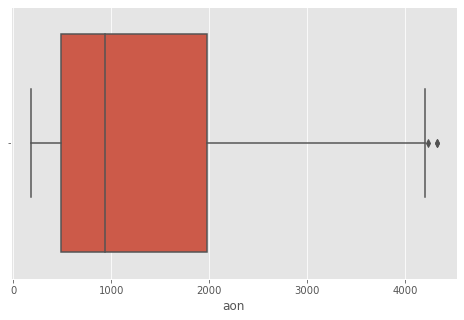

In [27]:
fig,ax = plt.subplots(figsize=(8,5))

sns.boxplot(df["aon"],ax=ax)

fig.show()

From the above boxplot, we can find that there are not much of outliers present in the variable.

**`Average Revenue per User (ARPU)`**

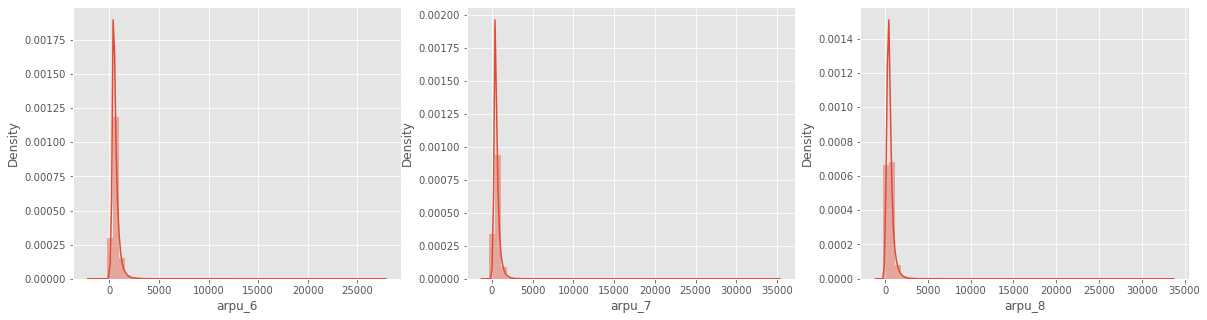

In [28]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

for i, col in enumerate(["arpu_6","arpu_7","arpu_8"]):

    sns.distplot(data_high_val[col],ax=ax[i])

fig.show()

In [29]:
df["arpu_good"] = data_high_val[["arpu_6","arpu_7"]].mean(axis=1)

df["arpu_act"] = data_high_val["arpu_8"]

In [30]:
rows_to_drop = df[df["arpu_act"] < 0].index

df.drop(rows_to_drop,inplace=True)

**`Onnet` and `Offnet`**

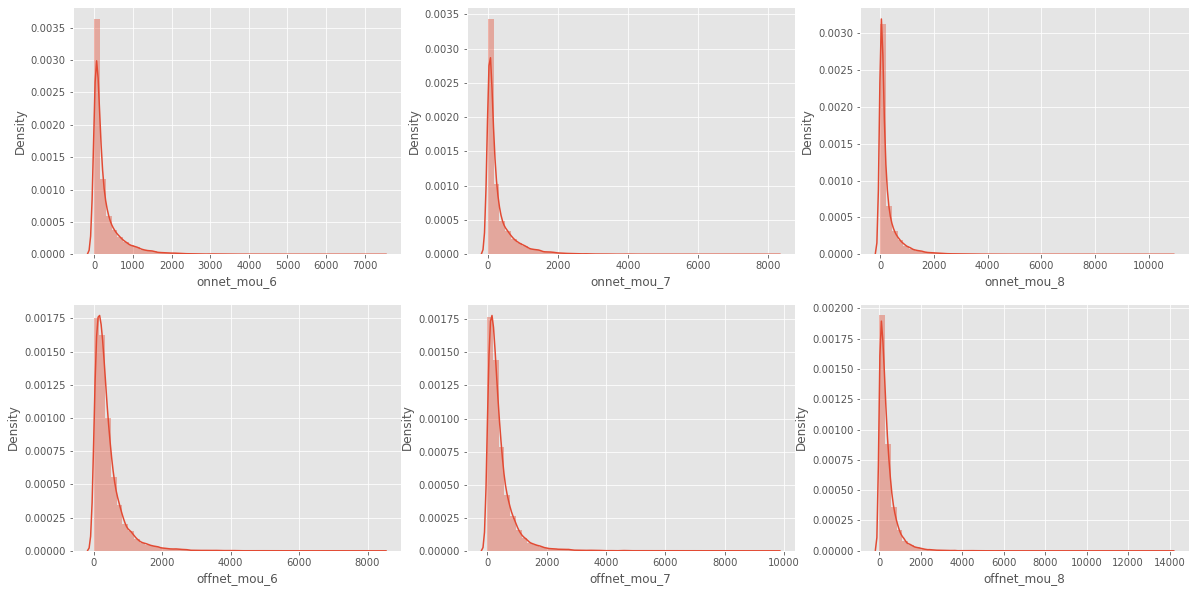

In [31]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

ax = ax.flatten()

for i, col in enumerate(["onnet_mou_6","onnet_mou_7","onnet_mou_8","offnet_mou_6","offnet_mou_7","offnet_mou_8"]):

    sns.distplot(data_high_val[col],ax=ax[i])

fig.show()

In [32]:
df["onnet_mou_good"] = data_high_val[["onnet_mou_6","onnet_mou_7"]].mean(axis=1)

df["onnet_mou_act"] = data_high_val["onnet_mou_8"]

In [33]:
df["offnet_mou_good"] = data_high_val[["offnet_mou_6","offnet_mou_7"]].mean(axis=1)

df["offnet_mou_act"] = data_high_val["offnet_mou_8"]

**`Outgoing`**

In [35]:
df["loc_og_in_op_mou_good"] = data_high_val[["loc_og_t2t_mou_6","loc_og_t2f_mou_7",
                                             "loc_og_t2t_mou_7","loc_og_t2f_mou_7"]].mean(axis=1)
df["loc_og_in_op_mou_act"] = data_high_val[["loc_og_t2t_mou_8","loc_og_t2f_mou_8"]].sum(axis=1)



df["loc_og_out_op_mou_good"] = data_high_val[["loc_og_t2m_mou_6","loc_og_t2m_mou_7"]].mean(axis=1)
df["loc_og_out_op_mou_act"] = data_high_val["loc_og_t2m_mou_8"]



df["std_og_in_op_mou_good"] = data_high_val[["std_og_t2t_mou_6","std_og_t2f_mou_7",
                                             "std_og_t2t_mou_7","std_og_t2f_mou_7"]].mean(axis=1)
df["std_og_in_op_mou_act"] = data_high_val[["std_og_t2t_mou_8","std_og_t2f_mou_8"]].sum(axis=1)



df["std_og_out_op_mou_good"] = data_high_val[["std_og_t2m_mou_6","std_og_t2m_mou_7"]].mean(axis=1)
df["std_og_out_op_mou_act"] = data_high_val["std_og_t2m_mou_8"]


df["og_others_total_good"] = data_high_val[["loc_og_t2c_mou_6","roam_og_mou_6",
                                            "spl_og_mou_6","isd_og_mou_6","og_others_6",
                                            "loc_og_t2c_mou_7","roam_og_mou_7","spl_og_mou_7",
                                            "isd_og_mou_7","og_others_7"]].mean(axis=1)
df["og_others_total_act"] = data_high_val[["loc_og_t2c_mou_8","roam_og_mou_8",
                                           "spl_og_mou_8","isd_og_mou_8","og_others_8"]].sum(axis=1)

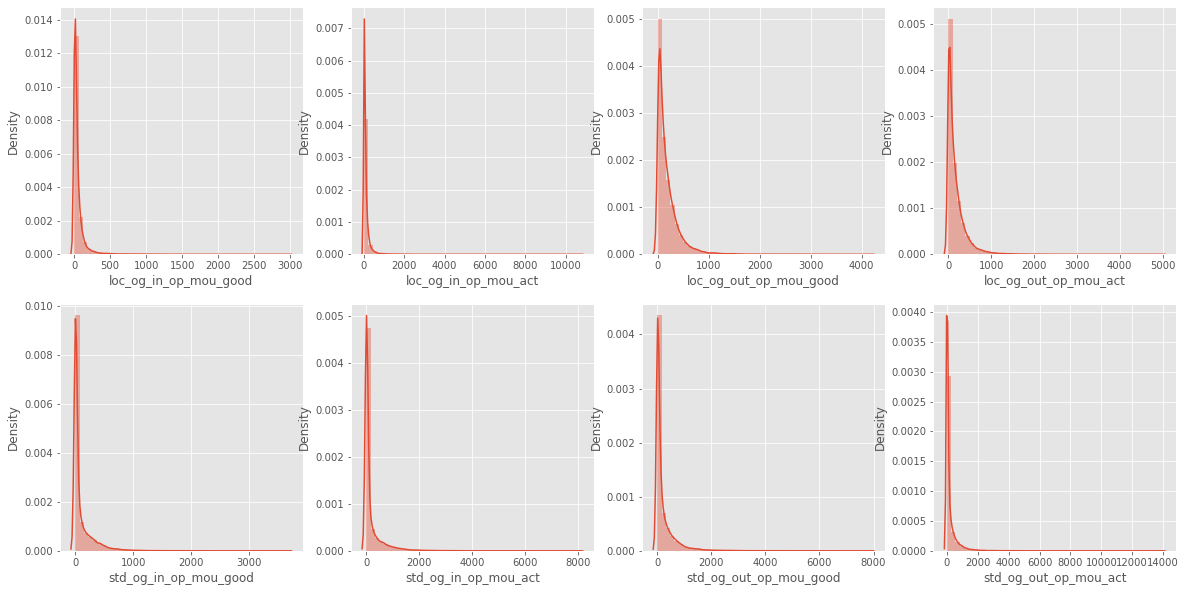

In [36]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

ax = ax.flatten()

for i, col in enumerate(["loc_og_in_op_mou_good","loc_og_in_op_mou_act","loc_og_out_op_mou_good","loc_og_out_op_mou_act",
                         "std_og_in_op_mou_good","std_og_in_op_mou_act","std_og_out_op_mou_good","std_og_out_op_mou_act"]):

    sns.distplot(df[col],ax=ax[i])

fig.show()

**`Incoming`**

In [37]:
df["loc_ic_in_op_mou_good"] = data_high_val[["loc_ic_t2t_mou_6","loc_ic_t2f_mou_7",
                                             "loc_ic_t2t_mou_7","loc_ic_t2f_mou_7"]].mean(axis=1)
df["loc_ic_in_op_mou_act"] = data_high_val[["loc_ic_t2t_mou_8","loc_ic_t2f_mou_8"]].sum(axis=1)



df["loc_ic_out_op_mou_good"] = data_high_val[["loc_ic_t2m_mou_6","loc_ic_t2m_mou_7"]].mean(axis=1)
df["loc_ic_out_op_mou_act"] = data_high_val["loc_ic_t2m_mou_8"]



df["std_ic_in_op_mou_good"] = data_high_val[["std_ic_t2t_mou_6","std_ic_t2f_mou_7",
                                             "std_ic_t2t_mou_7","std_ic_t2f_mou_7"]].mean(axis=1)
df["std_ic_in_op_mou_act"] = data_high_val[["std_ic_t2t_mou_8","std_ic_t2f_mou_8"]].sum(axis=1)



df["std_ic_out_op_mou_good"] = data_high_val[["std_ic_t2m_mou_6","std_ic_t2m_mou_7"]].mean(axis=1)
df["std_ic_out_op_mou_act"] = data_high_val["std_ic_t2m_mou_8"]



df["ic_others_total_good"] = data_high_val[["roam_ic_mou_6","spl_ic_mou_6","isd_ic_mou_6","ic_others_6",
                                            "roam_ic_mou_7","spl_ic_mou_7","isd_ic_mou_7","ic_others_7"]].mean(axis=1)
df["ic_others_total_act"] = data_high_val[["roam_ic_mou_8","spl_ic_mou_8","isd_ic_mou_8","ic_others_8"]].sum(axis=1)

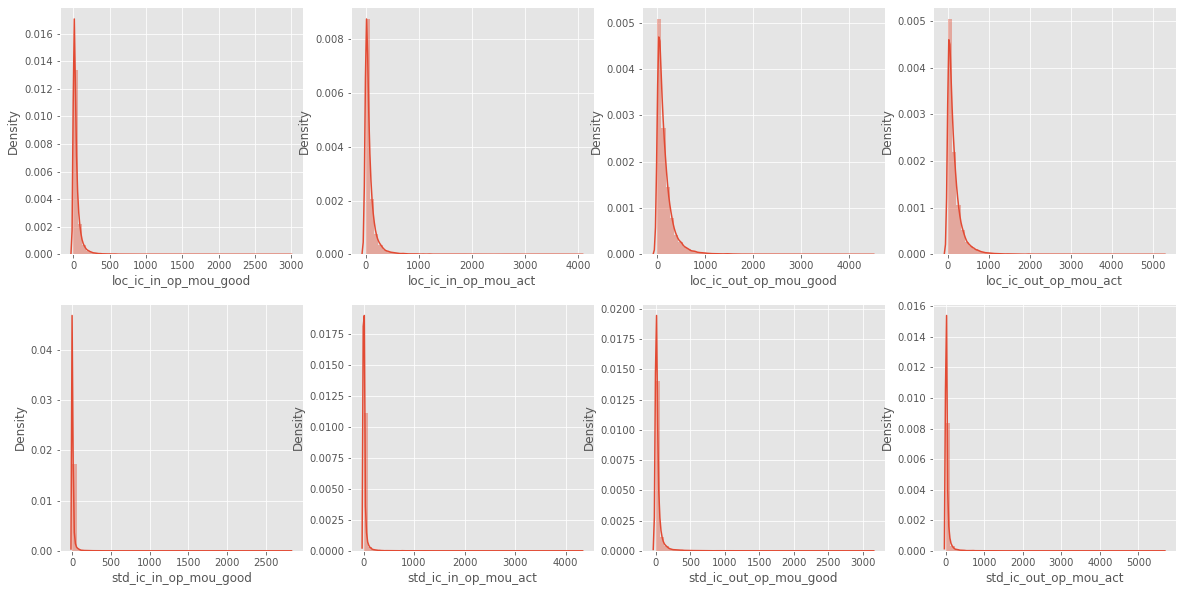

In [38]:
fig, ax = plt.subplots(2,4,figsize=(20,10))

ax = ax.flatten()

for i, col in enumerate(["loc_ic_in_op_mou_good","loc_ic_in_op_mou_act","loc_ic_out_op_mou_good","loc_ic_out_op_mou_act",
                         "std_ic_in_op_mou_good","std_ic_in_op_mou_act","std_ic_out_op_mou_good","std_ic_out_op_mou_act"]):

    sns.distplot(df[col],ax=ax[i])

fig.show()

**`Recharges`**

In [39]:
df["avg_rech_amt_good"] = (data_high_val[["total_rech_amt_6","total_rech_amt_7"]].sum(axis=1)
                           /data_high_val[["total_rech_num_6","total_rech_num_8"]].sum(axis=1)).fillna(0)
df["avg_rech_amt_act"] = (data_high_val["total_rech_amt_8"]/data_high_val["total_rech_num_8"]).fillna(0)



df["max_rech_amt_good"] = data_high_val[["max_rech_amt_6","max_rech_amt_7"]].max(axis=1)
df["max_rech_amt_act"] = data_high_val["max_rech_amt_8"]



df["last_day_rech_amt_good"] = data_high_val["last_day_rch_amt_7"]
df["last_day_rech_amt_act"] = data_high_val["last_day_rch_amt_8"]



recharge_recency_6 = (data_high_val["last_date_of_month_6"] - data_high_val["date_of_last_rech_6"]).dt.days
recharge_recency_7 = (data_high_val["last_date_of_month_7"] - data_high_val["date_of_last_rech_7"]).dt.days
recharge_recency_8 = (data_high_val["last_date_of_month_8"] - data_high_val["date_of_last_rech_8"]).dt.days



df["recharge_recency_good"] = np.ceil(pd.concat([recharge_recency_6,
                                                 recharge_recency_7],axis=1).mean(axis=1)).astype("int64")
df["recharge_recency_act"] = recharge_recency_8

In [40]:
drop_index = df["avg_rech_amt_good"][df["avg_rech_amt_good"]==np.inf].index

df.drop(drop_index,inplace=True)

**`Data`**

In [41]:
monthly_2g_cols = data_high_val.columns[data_high_val.columns.str.contains("monthly_2g")]

for col in monthly_2g_cols:
    
    print(data_high_val[col].value_counts(normalize=True).round(2),end="\n\n")



sachet_2g_cols = data_high_val.columns[data_high_val.columns.str.contains("sachet_2g")]

for col in sachet_2g_cols:
    
    print(data_high_val[col].value_counts(normalize=True).round(2),end="\n\n")



monthly_3g_cols = data_high_val.columns[data_high_val.columns.str.contains("monthly_3g")]

for col in monthly_3g_cols:
    
    print(data_high_val[col].value_counts(normalize=True).round(2),end="\n\n")



sachet_3g_cols = data_high_val.columns[data_high_val.columns.str.contains("sachet_3g")]

for col in sachet_3g_cols:
    
    print(data_high_val[col].value_counts(normalize=True).round(2),end="\n\n")

0    0.89
1    0.10
2    0.01
3    0.00
4    0.00
Name: monthly_2g_6, dtype: float64

0    0.88
1    0.10
2    0.01
3    0.00
4    0.00
5    0.00
Name: monthly_2g_7, dtype: float64

0    0.89
1    0.10
2    0.01
3    0.00
4    0.00
5    0.00
Name: monthly_2g_8, dtype: float64

0     0.82
1     0.08
2     0.03
3     0.02
4     0.01
5     0.01
6     0.01
7     0.00
8     0.00
9     0.00
10    0.00
12    0.00
11    0.00
13    0.00
14    0.00
15    0.00
17    0.00
19    0.00
18    0.00
16    0.00
22    0.00
21    0.00
25    0.00
24    0.00
20    0.00
30    0.00
27    0.00
34    0.00
39    0.00
32    0.00
Name: sachet_2g_6, dtype: float64

0     0.81
1     0.07
2     0.03
3     0.02
4     0.02
5     0.01
6     0.01
7     0.01
8     0.00
9     0.00
10    0.00
11    0.00
12    0.00
14    0.00
13    0.00
15    0.00
18    0.00
16    0.00
17    0.00
20    0.00
19    0.00
21    0.00
26    0.00
27    0.00
23    0.00
22    0.00
30    0.00
35    0.00
25    0.00
29    0.00
48    0.00
32    0.00
24   

We can see that almost 90% of the values are 0. Hence, these are not considered.

In [42]:
df["vol_2g_mb_good"] = data_high_val[["vol_2g_mb_6","vol_2g_mb_7"]].mean(axis=1)
df["vol_2g_mb_act"] = data_high_val["vol_2g_mb_8"]



df["vol_3g_mb_good"] = data_high_val[["vol_3g_mb_6","vol_3g_mb_7"]].mean(axis=1)
df["vol_3g_mb_act"] = data_high_val["vol_3g_mb_8"]



df["vbc_3g_good"] = data_high_val[["jun_vbc_3g","jul_vbc_3g"]].mean(axis=1)
df["vbc_3g_act"] = data_high_val["aug_vbc_3g"]

In [43]:
df.head()

,churn,aon,arpu_good,arpu_act,onnet_mou_good,onnet_mou_act,offnet_mou_good,offnet_mou_act,loc_og_in_op_mou_good,loc_og_in_op_mou_act,loc_og_out_op_mou_good,loc_og_out_op_mou_act,std_og_in_op_mou_good,std_og_in_op_mou_act,std_og_out_op_mou_good,std_og_out_op_mou_act,og_others_total_good,og_others_total_act,loc_ic_in_op_mou_good,loc_ic_in_op_mou_act,loc_ic_out_op_mou_good,loc_ic_out_op_mou_act,std_ic_in_op_mou_good,std_ic_in_op_mou_act,std_ic_out_op_mou_good,std_ic_out_op_mou_act,ic_others_total_good,ic_others_total_act,avg_rech_amt_good,avg_rech_amt_act,max_rech_amt_good,max_rech_amt_act,last_day_rech_amt_good,last_day_rech_amt_act,recharge_recency_good,recharge_recency_act,vol_2g_mb_good,vol_2g_mb_act,vol_3g_mb_good,vol_3g_mb_act,vbc_3g_good,vbc_3g_act
7000701601,1,802,1209.5150,3171.480,56.260,52.29,510.295,325.91,48.2625,93.51,378.005,162.28,16.9375,28.69,40.825,49.14,4.101,54.57,73.3300,66.84,219.525,121.19,29.3000,52.60,109.215,141.33,12.18125,78.37,197.500000,519.714286,1580,1580,0,779,5,5,0.0,0.00,0.000,0.00,19.060,57.74
7001524846,0,315,435.4720,137.362,382.360,35.08,87.645,136.48,128.6800,12.49,75.770,50.54,62.4975,22.58,11.865,75.69,0.000,17.38,8.4200,0.31,35.780,15.48,0.1450,0.10,13.255,0.65,0.00000,0.00,31.454545,8.571429,154,30,0,10,3,1,178.0,0.03,375.475,11.94,516.405,21.03
7002191713,0,2607,349.2585,593.260,305.075,534.24,266.295,482.46,13.9550,59.52,99.205,294.46,133.0975,498.23,154.150,156.94,4.324,8.00,18.8650,60.07,80.705,195.18,38.4925,156.49,168.960,317.91,71.91625,486.94,44.705882,65.181818,110,130,50,0,10,1,0.0,0.02,0.000,0.00,0.000,0.00
7000875565,0,511,365.4220,187.894,62.260,70.61,263.015,162.76,29.1825,77.64,209.640,128.28,2.6175,3.23,43.750,18.29,2.100,5.91,32.5325,61.60,188.250,150.16,36.8575,8.51,45.880,73.93,0.35375,0.23,76.500000,80.000000,110,130,100,130,0,17,0.0,0.00,0.000,0.00,12.170,0.00
7000187447,0,667,354.4940,25.499,597.595,7.79,30.820,5.54,9.7475,0.00,29.270,0.00,286.9300,0.00,0.775,0.00,1.197,13.34,8.6350,0.00,24.860,0.00,2.1575,0.00,0.640,0.00,0.59500,4.81,35.478261,7.500000,110,30,0,0,1,6,0.0,0.00,0.000,0.00,0.000,0.00


In [44]:
df.shape

(28741, 42)

## Data Preprocessing

**Splitting the data into Train and Test**

In [45]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42, stratify=df["churn"])

**Using Power Transformer to standardize the data**

In [46]:
pt = PowerTransformer(method="yeo-johnson")

In [47]:
df_train.iloc[:,1:] = pt.fit_transform(df_train.iloc[:,1:])

df_train.describe()

,churn,aon,arpu_good,arpu_act,onnet_mou_good,onnet_mou_act,offnet_mou_good,offnet_mou_act,loc_og_in_op_mou_good,loc_og_in_op_mou_act,loc_og_out_op_mou_good,loc_og_out_op_mou_act,std_og_in_op_mou_good,std_og_in_op_mou_act,std_og_out_op_mou_good,std_og_out_op_mou_act,og_others_total_good,og_others_total_act,loc_ic_in_op_mou_good,loc_ic_in_op_mou_act,loc_ic_out_op_mou_good,loc_ic_out_op_mou_act,std_ic_in_op_mou_good,std_ic_in_op_mou_act,std_ic_out_op_mou_good,std_ic_out_op_mou_act,ic_others_total_good,ic_others_total_act,avg_rech_amt_good,avg_rech_amt_act,max_rech_amt_good,max_rech_amt_act,last_day_rech_amt_good,last_day_rech_amt_act,recharge_recency_good,recharge_recency_act,vol_2g_mb_good,vol_2g_mb_act,vol_3g_mb_good,vol_3g_mb_act,vbc_3g_good,vbc_3g_act
count,20118.000000,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04,2.011800e+04
mean,0.062183,-2.038085e-16,1.286510e-13,2.032456e-16,-1.058459e-17,-1.636804e-16,-5.883332e-17,-2.812192e-16,-6.292257e-17,1.182626e-16,8.696140e-17,-3.774692e-17,-9.686169e-17,1.257127e-17,1.539125e-16,-1.325060e-16,-7.510202e-17,3.340768e-16,1.013759e-16,-7.826416e-17,-1.701591e-16,-9.651954e-18,-1.323239e-16,-4.350609e-16,-2.763693e-17,-2.721752e-17,-4.685806e-17,3.358924e-16,-1.955721e-16,3.898832e-16,-4.534928e-16,-2.062567e-16,2.183361e-16,-3.609467e-16,3.409364e-17,-4.473341e-16,2.359734e-17,1.860415e-16,-8.349464e-16,1.523121e-17,1.303748e-15,-3.482429e-16
std,0.241494,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,0.000000,-1.915536e+00,-1.697434e+00,-3.005160e+00,-2.549252e+00,-2.084632e+00,-3.387993e+00,-2.402057e+00,-2.116647e+00,-1.789250e+00,-2.407143e+00,-1.915100e+00,-1.252873e+00,-1.145575e+00,-1.508329e+00,-1.309848e+00,-1.297043e+00,-1.185135e+00,-2.211920e+00,-1.910798e+00,-2.657642e+00,-2.098772e+00,-1.262054e+00,-1.124542e+00,-1.559956e+00,-1.293490e+00,-9.813132e-01,-8.982208e-01,-5.380801e+00,-2.535517e+00,-6.493011e+00,-2.588582e+00,-1.720334e+00,-1.510046e+00,-1.819819e+00,-1.386536e+00,-7.757066e-01,-6.691478e-01,-6.448890e-01,-5.777949e-01,-6.330078e-01,-5.973382e-01
25%,0.000000,-8.043815e-01,-8.414732e-01,-5.138455e-01,-6.734091e-01,-6.454247e-01,-6.238916e-01,-6.128773e-01,-6.752413e-01,-6.645935e-01,-7.065269e-01,-6.768564e-01,-1.133317e+00,-1.145575e+00,-8.860830e-01,-1.145421e+00,-9.996495e-01,-1.185135e+00,-6.693547e-01,-6.435251e-01,-6.547783e-01,-6.211175e-01,-1.046628e+00,-1.124542e+00,-8.220157e-01,-1.124255e+00,-9.788459e-01,-8.982208e-01,-6.479305e-01,-6.014014e-01,-4.844612e-01,-3.288460e-01,-5.074084e-01,-7.381719e-01,-8.099127e-01,-5.217964e-01,-7.757066e-01,-6.691478e-01,-6.448890e-01,-5.777949e-01,-6.330078e-01,-5.973382e-01
50%,0.000000,-2.407514e-02,-3.593374e-02,-1.726393e-02,-2.257580e-02,4.793495e-03,-5.750552e-03,1.838041e-02,3.914996e-02,7.067781e-02,2.989533e-02,5.504323e-02,2.999750e-02,2.937552e-02,7.969146e-02,9.442749e-02,-2.953828e-02,4.887582e-02,3.742457e-02,5.555369e-02,1.506027e-02,3.712462e-02,2.367667e-04,-2.124947e-02,7.225021e-02,8.842999e-02,-3.976814e-01,-5.243365e-01,2.385782e-02,1.00129

In [48]:
df_test.iloc[:,1:] = pt.transform(df_test.iloc[:,1:])

df_test.describe()

,churn,aon,arpu_good,arpu_act,onnet_mou_good,onnet_mou_act,offnet_mou_good,offnet_mou_act,loc_og_in_op_mou_good,loc_og_in_op_mou_act,loc_og_out_op_mou_good,loc_og_out_op_mou_act,std_og_in_op_mou_good,std_og_in_op_mou_act,std_og_out_op_mou_good,std_og_out_op_mou_act,og_others_total_good,og_others_total_act,loc_ic_in_op_mou_good,loc_ic_in_op_mou_act,loc_ic_out_op_mou_good,loc_ic_out_op_mou_act,std_ic_in_op_mou_good,std_ic_in_op_mou_act,std_ic_out_op_mou_good,std_ic_out_op_mou_act,ic_others_total_good,ic_others_total_act,avg_rech_amt_good,avg_rech_amt_act,max_rech_amt_good,max_rech_amt_act,last_day_rech_amt_good,last_day_rech_amt_act,recharge_recency_good,recharge_recency_act,vol_2g_mb_good,vol_2g_mb_act,vol_3g_mb_good,vol_3g_mb_act,vbc_3g_good,vbc_3g_act
count,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000,8623.000000
mean,0.062159,-0.002277,-0.010719,-0.031712,0.010325,-0.005868,-0.008000,-0.023573,0.010786,0.001699,-0.000289,-0.009330,-0.004016,-0.013533,-0.004699,-0.008270,-0.014459,-0.023070,0.008666,0.009601,-0.005086,-0.011925,-0.004525,-0.011173,-0.004322,-0.012168,-0.022169,-0.004052,0.003782,-0.011010,-0.009022,-0.019083,-0.000462,0.003450,-0.003669,0.000446,-0.008942,-0.001073,-0.007395,-0.000142,-0.011135,-0.010527
std,0.241459,0.991626,0.992713,0.985280,1.007392,1.006579,0.990272,0.992005,1.006222,1.011385,0.997417,1.006069,1.004865,1.000773,0.998723,0.998290,0.987817,0.997396,1.013377,1.017872,1.000859,1.009059,1.002817,0.999973,1.004597,1.000429,0.992410,0.993624,0.984106,1.003838,0.954495,0.994729,1.002731,0.999114,0.997663,1.002965,0.996027,0.997999,0.994770,0.999057,0.993776,0.994267
min,0.000000,-1.915536,-1.697267,-3.005160,-2.549252,-2.084632,-3.387993,-2.402057,-2.116647,-1.789250,-2.407143,-1.915100,-1.252873,-1.145575,-1.508329,-1.309848,-1.297043,-1.185135,-2.211920,-1.910798,-2.657642,-2.098772,-1.262054,-1.124542,-1.559956,-1.293490,-0.981313,-0.898221,-5.380801,-2.535517,-6.493011,-2.588582,-1.720334,-1.510046,-1.819819,-1.386536,-0.775707,-0.669148,-0.644889,-0.577795,-0.633008,-0.597338
25%,0.000000,-0.799592,-0.839870,-0.518903,-0.666946,-0.653527,-0.626549,-0.616123,-0.677448,-0.701423,-0.711614,-0.696269,-1.121231,-1.145575,-0.886678,-1.171103,-0.989943,-1.185135,-0.676949,-0.646243,-0.680689,-0.644115,-1.057750,-1.124542,-0.822016,-1.124255,-0.981313,-0.898221,-0.627827,-0.630083,-0.484461,-0.557649,-0.507408,-0.738172,-0.809913,-0.521796,-0.775707,-0.669148,-0.644889,-0.577795,-0.633008,-0.597338
50%,0.000000,-0.016373,-0.033222,-0.032475,-0.021195,0.001395,-0.020968,-0.002214,0.058398,0.086311,0.015466,0.062129,-0.010510,-0.026169,0.068728,0.106868,-0.041741,0.016844,0.038837,0.065821,0.006292,0.027558,-0.008405,-0.048313,0.053851,0.053477,-0.428696,-0.506225,0.022921,0.003225,-0.248223,-0.033940,0.088131,0.045564,-0.225086,-0.049973,-0.775707,-0.669148,-0.644889,-0.577795,-0.633008,-0.597338
75%,0.000000,0.870026,0.768031,0.505037,0.744867,0.688718,0.608442,0.615471,0.704335,0.716950,0.686129,0.692457,0.943349,0.930173,0.826572,0.828384,0.788448,0.833879,0.701287,0.704310,0.655323,0.648564,0.836965,0.893120,0.743095,0.821863,0.946604,1.056951,0.584875,0.588787,0.696806,0.465030,0.620609,0.691460,0.764654,0.861305,1.172393,1.254819,1.427946,0.339905,1.363783,1.232209
max,1.000000,1.863343,2.565197,9.202811,3.524463,3.761533,4.031927,4.607935,3.605195,4.393749,3.758912,3.738593,2.155995,2.011529,2.409804,2.345822,2.202652,2.315877,4.009817,4.048185,3.982790,3.759037,2.489867,2.303140,3.204246,2.887062,1.895335,1.825169,6.027019,6.732599,4.657812,6.676282,4.56

**Splitting train and test data into X and y**

In [49]:
X_train = df_train.drop("churn", axis=1)

y_train = df_train["churn"]

In [50]:
X_test = df_test.drop("churn", axis=1)

y_test = df_test["churn"]

**Using SMOTE Technique to create resampled data**

In [51]:
smt = SMOTE(random_state=42, k_neighbors=5, n_jobs=-1)

X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)

y_resampled_smt.value_counts()

1    18867
0    18867
Name: churn, dtype: int64

**Using ADASYN Technique to create resampled data**

In [52]:
ada = ADASYN(random_state=42, n_neighbors=5, n_jobs=-1)

X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)

y_resampled_ada.value_counts()

1    18963
0    18867
Name: churn, dtype: int64

## Model Building

### Defining functions for printing several metrics

In [53]:
def plot_rfe_result(grid_scores):
    
    fig, ax = plt.subplots(figsize=(15,5))

    plt.plot(grid_scores)

    ax.set_xlabel("Features")
    ax.set_ylabel("Recall")

    fig.show()

In [54]:
def confusion_matrix(truth, pred):
    
    confusion = metrics.confusion_matrix(truth, pred)
    
    confusion_matrix = pd.DataFrame(index=["0","1"],data={"0":confusion[:,0],"1":confusion[:,1]})
    
    confusion_matrix.columns = pd.MultiIndex.from_product([["Predicted"],["0","1"]])
    
    confusion_matrix.set_index(pd.MultiIndex.from_product([["Actual"],["0","1"]]),inplace=True)
    
    print(confusion_matrix)

In [55]:
def plot_roc(truth, pred):
    
    fpr, tpr, thresholds = metrics.roc_curve(truth, pred, drop_intermediate=False)

    auc_score = metrics.roc_auc_score(truth, pred)

    fig,ax = plt.subplots(figsize=(10,10))

    ax.plot(fpr, tpr, label='ROC Curve (Area = %0.3f)'%auc_score)
    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlabel("False Positive Rate or [1 - True Negative Rate]")
    ax.set_ylabel("True Positive Rate")

    ax.legend(loc=0)

    fig.show()

### Building model using Logistic Regression

In [56]:
logreg = LogisticRegression(random_state=42)

**Model building using the base data**

In [57]:
rfecv_base = RFECV(estimator=logreg, cv=5, scoring="recall", n_jobs=-1)

rfecv_base.fit(X_train, y_train)

RFECV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
      scoring='recall')

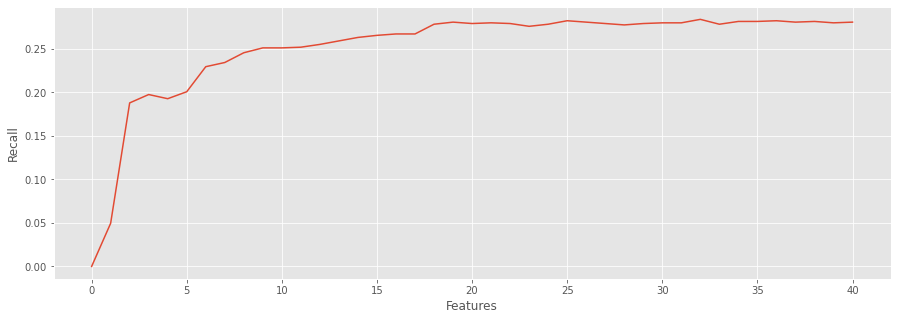

In [58]:
plot_rfe_result(rfecv_base.grid_scores_)

In [59]:
bal_cols_base = X_train.columns[rfecv_base.support_]

logreg_base_cv = cross_validate(logreg, X_train[bal_cols_base], y_train, scoring="recall", cv=5,
                                n_jobs=-1, return_train_score=True, return_estimator=True)

logreg_base_cv["test_score"]

array([0.292     , 0.356     , 0.25498008, 0.264     , 0.24      ])

In [60]:
logreg_base_best = logreg_base_cv["estimator"][logreg_base_cv["test_score"].argmax()]

In [61]:
y_test_pred_logreg_base = logreg_base_best.predict(X_test[bal_cols_base])

y_test_pred_prob_logreg_base = logreg_base_best.predict_proba(X_test[bal_cols_base])[:,1]

In [62]:
print(metrics.classification_report(y_test, y_test_pred_logreg_base))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8087
           1       0.58      0.30      0.40       536

    accuracy                           0.94      8623
   macro avg       0.77      0.64      0.69      8623
weighted avg       0.93      0.94      0.93      8623



In [63]:
confusion_matrix(y_test, y_test_pred_logreg_base)

         Predicted     
                 0    1
Actual 0      7971  116
       1       373  163


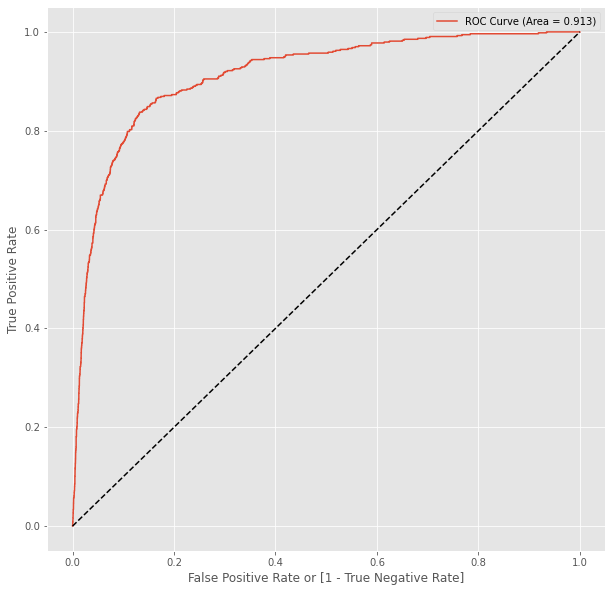

In [64]:
plot_roc(y_test, y_test_pred_prob_logreg_base)

**Model building using SMOTE Data**

In [65]:
rfecv_smt = RFECV(estimator=logreg, cv=5, scoring="recall", n_jobs=-1)

rfecv_smt.fit(X_resampled_smt, y_resampled_smt)

RFECV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
      scoring='recall')

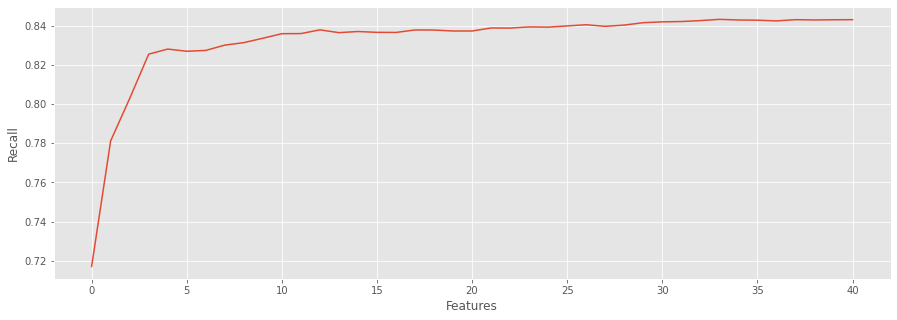

In [66]:
plot_rfe_result(rfecv_smt.grid_scores_)

In [67]:
bal_cols_smt = X_resampled_smt.columns[rfecv_smt.support_]

logreg_smt_cv = cross_validate(logreg, X_resampled_smt[bal_cols_smt], y_resampled_smt, scoring="recall", cv=5,
                                n_jobs=-1, return_train_score=True, return_estimator=True)

logreg_smt_cv["test_score"]

array([0.82984363, 0.84627617, 0.84499205, 0.8563858 , 0.84203552])

In [68]:
logreg_smt_best = logreg_smt_cv["estimator"][logreg_smt_cv["test_score"].argmax()]

In [69]:
y_test_pred_logreg_smt = logreg_smt_best.predict(X_test[bal_cols_smt])

y_test_pred_prob_logreg_smt = logreg_smt_best.predict_proba(X_test[bal_cols_smt])[:,1]

In [70]:
print(metrics.classification_report(y_test, y_test_pred_logreg_smt))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8087
           1       0.28      0.84      0.42       536

    accuracy                           0.86      8623
   macro avg       0.63      0.85      0.67      8623
weighted avg       0.94      0.86      0.89      8623



In [71]:
confusion_matrix(y_test, y_test_pred_logreg_smt)

         Predicted      
                 0     1
Actual 0      6933  1154
       1        88   448


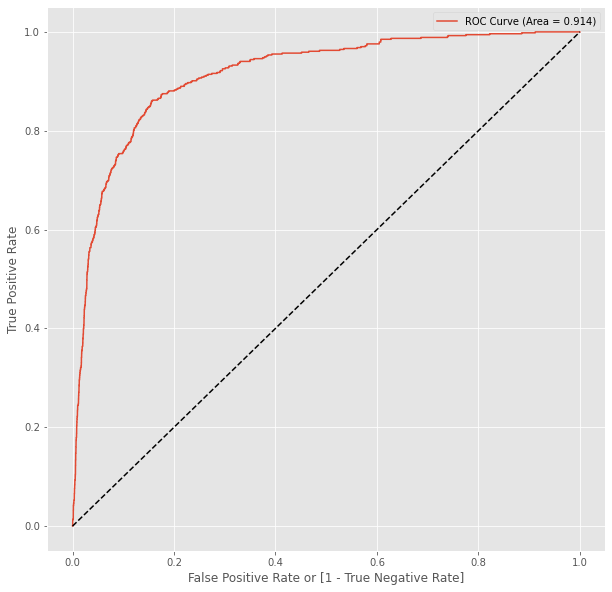

In [72]:
plot_roc(y_test, y_test_pred_prob_logreg_smt)

**Model building using ADASYN data**

In [73]:
rfecv_ada = RFECV(estimator=logreg, cv=5, scoring="recall", n_jobs=-1)

rfecv_ada.fit(X_resampled_ada, y_resampled_ada)

RFECV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
      scoring='recall')

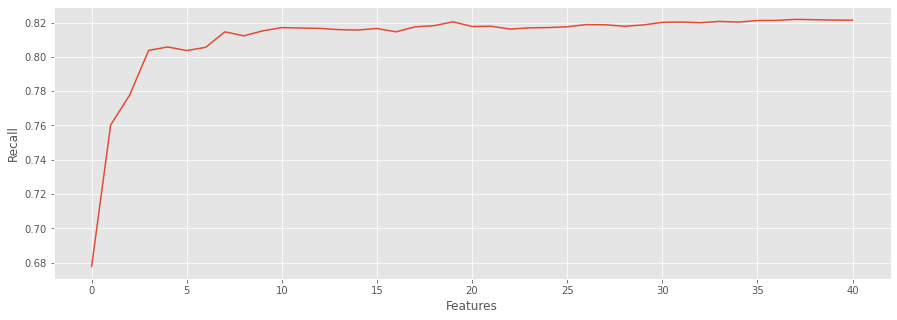

In [74]:
plot_rfe_result(rfecv_ada.grid_scores_)

In [75]:
bal_cols_ada = X_resampled_ada.columns[rfecv_ada.support_]

logreg_ada_cv = cross_validate(logreg, X_resampled_ada[bal_cols_ada], y_resampled_ada, scoring="recall", cv=5,
                                n_jobs=-1, return_train_score=True, return_estimator=True)

logreg_ada_cv["test_score"]

array([0.81724684, 0.8589135 , 0.77801213, 0.81334036, 0.83970472])

In [76]:
logreg_ada_best = logreg_ada_cv["estimator"][logreg_ada_cv["test_score"].argmax()]

In [77]:
y_test_pred_logreg_ada = logreg_ada_best.predict(X_test[bal_cols_ada])

y_test_pred_prob_logreg_ada = logreg_ada_best.predict_proba(X_test[bal_cols_ada])[:,1]

In [78]:
print(metrics.classification_report(y_test, y_test_pred_logreg_ada))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8087
           1       0.24      0.85      0.38       536

    accuracy                           0.83      8623
   macro avg       0.62      0.84      0.64      8623
weighted avg       0.94      0.83      0.87      8623



In [79]:
confusion_matrix(y_test, y_test_pred_logreg_ada)

         Predicted      
                 0     1
Actual 0      6665  1422
       1        79   457


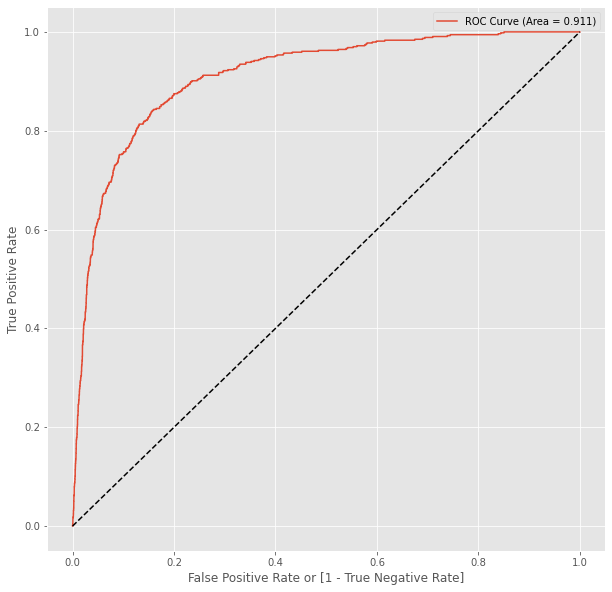

In [80]:
plot_roc(y_test, y_test_pred_prob_logreg_ada)

### Building model using Random Forest

Since we observe from the above results that model built by using ADASYN data has provided better recall, the same data shall be used to build the Random Forest model.

**Coarse Tuning using Randomized Search CV**

In [81]:
rf_rcv = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

In [82]:
hyper_params_rcv = {"max_depth": range(3,31,3), 
                    "max_features": range(4,41,2), 
                    "min_samples_leaf": range(20,101,10), 
                    "n_estimators": range(10,101,10)}

In [83]:
rcv = RandomizedSearchCV(estimator=rf_rcv,
                         param_distributions=hyper_params_rcv,
                         verbose=1,
                         cv=5,
                         return_train_score=True,
                         n_jobs=-1,
                         n_iter=50,
                         random_state=42,
                         scoring="recall")

In [84]:
rcv.fit(X_resampled_ada, y_resampled_ada)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 20.9min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                                    random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 31, 3),
                                        'max_features': range(4, 41, 2),
                                        'min_samples_leaf': range(20, 101, 10),
                                        'n_estimators': range(10, 101, 10)},
                   random_state=42, return_train_score=True, scoring='recall',
                   verbose=1)

In [85]:
rcv.best_score_

0.9071861223372835

In [86]:
rcv.best_estimator_

RandomForestClassifier(max_depth=12, max_features=32, min_samples_leaf=20,
                       n_estimators=70, n_jobs=-1, oob_score=True,
                       random_state=42)

In [87]:
rcv.best_estimator_.oob_score_

0.9351308485329104

In [88]:
rf_rcv_best = rcv.best_estimator_

y_test_pred_rf_rcv = rf_rcv_best.predict(X_test)

y_test_pred_prob_rf_rcv = rf_rcv_best.predict_proba(X_test)[:,-1]

In [89]:
print(metrics.classification_report(y_test, y_test_pred_rf_rcv))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      8087
           1       0.36      0.71      0.48       536

    accuracy                           0.90      8623
   macro avg       0.67      0.81      0.71      8623
weighted avg       0.94      0.90      0.92      8623



In [90]:
confusion_matrix(y_test, y_test_pred_rf_rcv)

         Predicted     
                 0    1
Actual 0      7412  675
       1       156  380


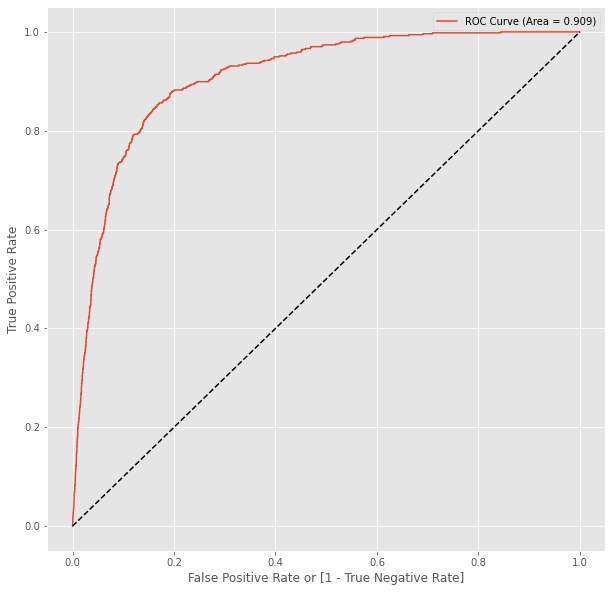

In [91]:
plot_roc(y_test, y_test_pred_prob_rf_rcv)

In [92]:
rcv_results = pd.DataFrame(rcv.cv_results_)

sel_cols = ["param_max_depth","param_max_features","param_min_samples_leaf",
            "param_n_estimators","rank_test_score","mean_test_score"]

rcv_results.sort_values(by="rank_test_score")[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_test_score
18,12,32,20,70,1,0.907186
48,24,36,20,80,2,0.903125
47,21,16,20,60,3,0.902282
30,21,12,20,80,4,0.901755
7,9,26,30,70,5,0.901649
10,30,18,20,40,6,0.899856
29,27,22,30,30,7,0.897483
15,12,8,20,20,8,0.896271
8,27,20,40,40,9,0.896270
16,9,40,30,20,10,0.895795


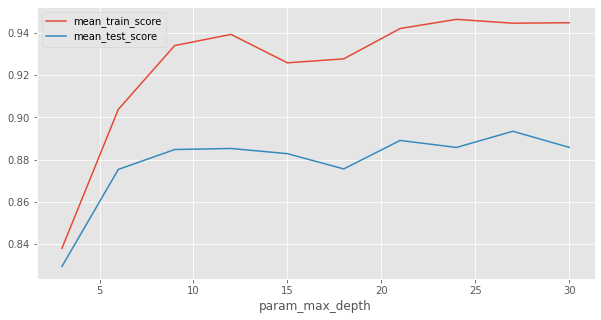

In [93]:
rcv_results.groupby("param_max_depth")["mean_train_score","mean_test_score"].mean().plot(figsize=(10,5))

plt.show()

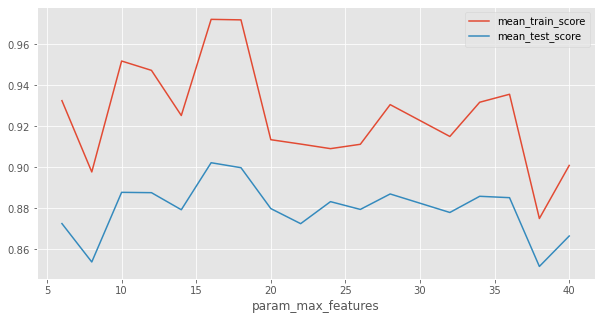

In [94]:
rcv_results.groupby("param_max_features")["mean_train_score","mean_test_score"].mean().plot(figsize=(10,5))

plt.show()

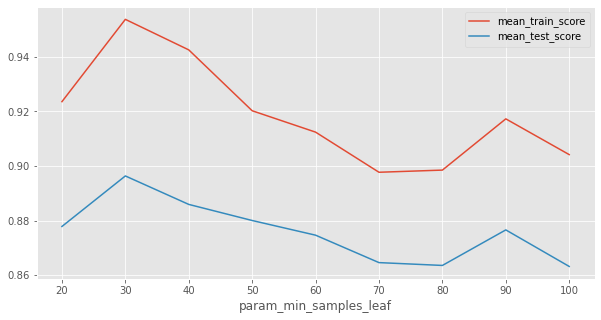

In [95]:
rcv_results.groupby("param_min_samples_leaf")["mean_train_score","mean_test_score"].mean().plot(figsize=(10,5))

plt.show()

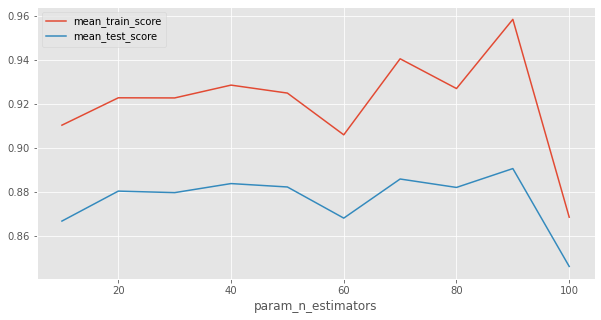

In [96]:
rcv_results.groupby("param_n_estimators")["mean_train_score","mean_test_score"].mean().plot(figsize=(10,5))

plt.show()

**Fine Tuning using Grid Search CV**

In [97]:
hyper_params_gcv = {"max_depth": range(8,13),
                    "max_features": range(16,19)}

In [98]:
rf_gcv = RandomForestClassifier(random_state=42, n_jobs=-1, min_samples_leaf=30, n_estimators=90, oob_score=True)

In [99]:
grid_cv = GridSearchCV(estimator=rf_gcv,
                        param_grid=hyper_params_gcv,
                        verbose=1,
                        cv=5,
                        return_train_score=True,
                        n_jobs=-1,
                        scoring="recall")

In [100]:
grid_cv.fit(X_resampled_ada, y_resampled_ada)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  6.6min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_leaf=30,
                                              n_estimators=90, n_jobs=-1,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(8, 13),
                         'max_features': range(16, 19)},
             return_train_score=True, scoring='recall', verbose=1)

In [101]:
grid_cv.best_score_

0.9030205819959264

In [102]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=10, max_features=18, min_samples_leaf=30,
                       n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

In [103]:
grid_cv.best_estimator_.oob_score_

0.9222310335712398

In [104]:
rf_gcv_best = grid_cv.best_estimator_

y_test_pred_rf_gcv = rf_gcv_best.predict(X_test)

y_test_pred_prob_rf_gcv = rf_gcv_best.predict_proba(X_test)[:,-1]

In [105]:
print(metrics.classification_report(y_test, y_test_pred_rf_gcv))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      8087
           1       0.33      0.75      0.46       536

    accuracy                           0.89      8623
   macro avg       0.66      0.82      0.70      8623
weighted avg       0.94      0.89      0.91      8623



In [106]:
confusion_matrix(y_test, y_test_pred_rf_gcv)

         Predicted     
                 0    1
Actual 0      7268  819
       1       134  402


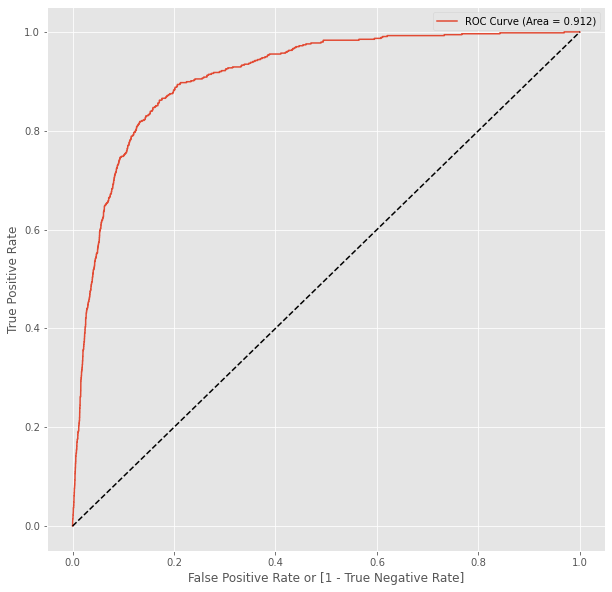

In [107]:
plot_roc(y_test, y_test_pred_prob_rf_gcv)

## Conclusion

**Identifying the most suitable model for prediction**

From all the above models, we can find that the Logistic Regression model created by using the resampled data using ADASYN technique is having better recall compared to all other models. Hence, it can be used to predict churn.

In [123]:
print(metrics.classification_report(y_test, y_test_pred_logreg_ada))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      8087
           1       0.24      0.85      0.38       536

    accuracy                           0.83      8623
   macro avg       0.62      0.84      0.64      8623
weighted avg       0.94      0.83      0.87      8623



In [124]:
confusion_matrix(y_test, y_test_pred_logreg_ada)

         Predicted      
                 0     1
Actual 0      6665  1422
       1        79   457


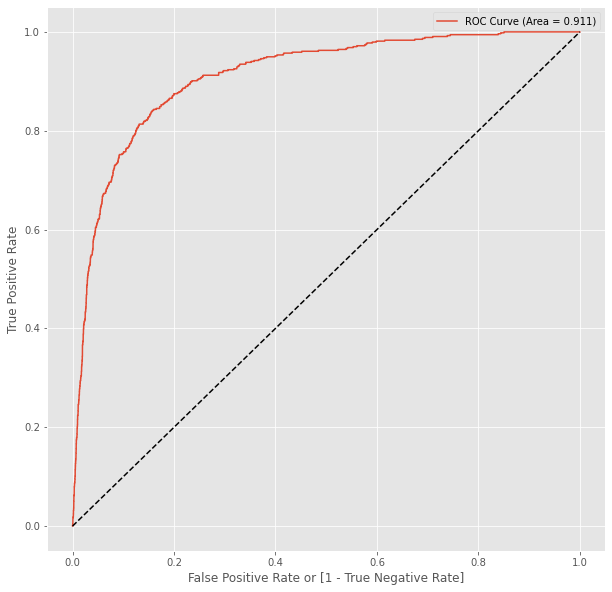

In [125]:
plot_roc(y_test, y_test_pred_prob_logreg_ada)

**Identifying most important 3 predictors**

In [126]:
importances = pd.Series(rf_gcv_best.feature_importances_,index=X_train.columns)

importances.sort_values(ascending=False).round(4).head(3)

recharge_recency_act     0.2500
last_day_rech_amt_act    0.1734
loc_ic_out_op_mou_act    0.1553
dtype: float64

From the above results, the management can adapt the following strategies:

- Providing offers on recharges while during the month-end so that the customers are attracted by it and do not tend to leave the operator.

- Providing offers in order to charge less on calls made to other operators so that the customers do not to leave the operator.